Click [here]() to access the associated Medium article.

# Setup

In [1]:
!pip install -q numpy pandas matplotlib

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot style
plt.style.use("plot_style/ggplot_classic.mplstyle")

# Inappropriate Use of Piecharts

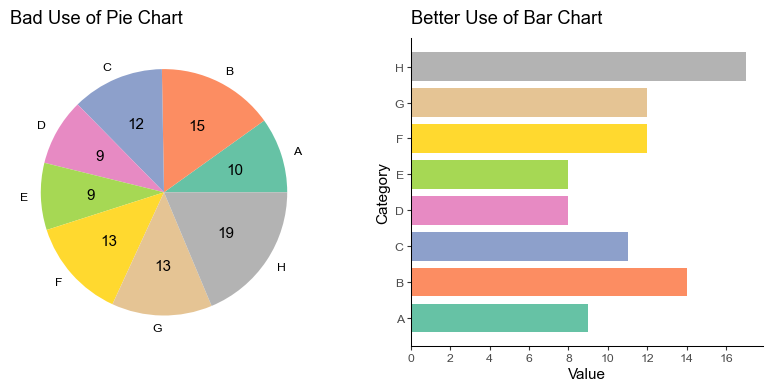

In [25]:
# Data
np.random.seed(7)  # set random seed for reproducibility
n_cat = 8  # number of categories
df = pd.DataFrame(
    {
        "Category": [chr(i) for i in range(ord("A"), ord("A") + n_cat)],
        "Value": np.random.randint(5, 20, n_cat),
    }
)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
colors = plt.cm.Set2.colors

# Bad Example
bad_plot = ax[0].pie(
    df["Value"],
    labels=df["Category"],
    autopct="%.0f",
    colors=colors,
)
ax[0].set(title="Bad Use of Pie Chart")

# Good Example
good_plot = ax[1].barh(df["Category"], df["Value"], color=colors)
ax[1].set(title="Better Use of Bar Chart", xlabel="Value", ylabel="Category")

# Save plot
plt.savefig("image/pie.png", bbox_inches="tight", dpi=200)

plt.show()